# Name - Gurram Bhaskar

# THE SPARKS FOUNDATION INTERNSHIP 

# TASK 1

# Supervised ML - Student scores Dataset





In [6]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Importing Data 
data_url = "http://bit.ly/w-data"
data_frame = pd.read_csv(data_url)
print("importing successful")
data_frame.head(10)


importing successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Visualizing Data

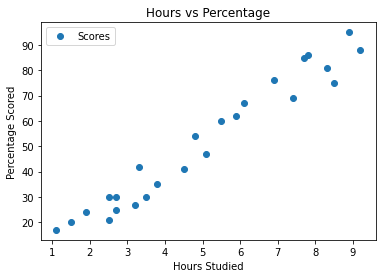

In [8]:
#Plotting of data using matplotlib
data_frame.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

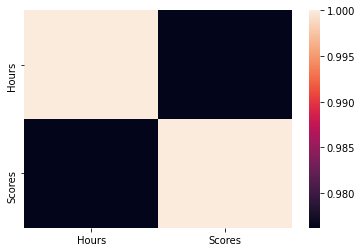

In [9]:
sns.heatmap(data_frame.corr())

In [12]:
#Assigning Testing Data and Training Data using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [13]:
#Training the DataSet
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training stage complete")

Training stage complete


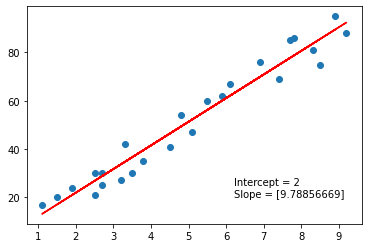

In [14]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_ # y = mx + c
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.text(6.2,25,(f"Intercept = {round(regressor.intercept_)}"))
plt.text(6.2,20,(f"Slope = {regressor.coef_}"))
plt.show()


We see that the regressor line is quite close to the data points (scores), which indicates the model is quite well trained to give desired results

In [15]:
print(f"Testing Data : {X_test}")
y_pred = regressor.predict(X_test)


Testing Data : [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [16]:
print(f"Predicted Data : {y_pred}")

Predicted Data : [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [17]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


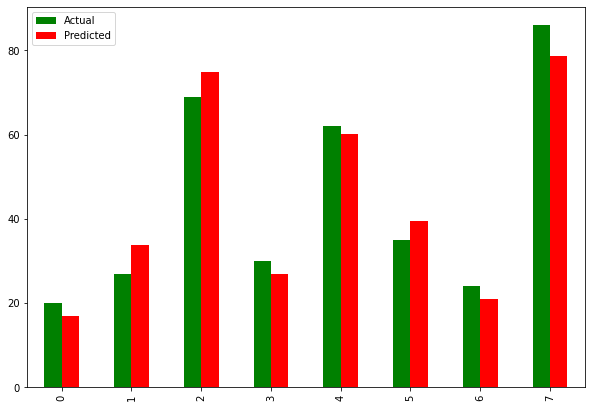

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,7),color={'Actual':'green','Predicted':'red'})

plt.show()

Now that the model has been trained and given desired results, we can give it our own data and make our own predictions

In [27]:
# prediction
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_predict = regressor.predict(test)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_predict}%")


No of Hours = 9.25
Predicted Score = [92.91505723]%


Finding performance of the model by using the following metrics

In [20]:
from sklearn import metrics

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Explained Variance Score : ", metrics.explained_variance_score(y_test,y_pred))
print("Maximum Error : ", metrics.max_error(y_test,y_pred))

Mean Absolute Error :  4.419727808027651
Mean Squared Error :  22.965097212700428
Root Mean Squared Error :  4.7921912746363144
Explained Variance Score :  0.9568649952899161
Maximum Error :  7.27836446101557
